In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
main_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/stanford-hmp2'
x_rcc_test_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_30_Finetune_Data/X_finetune_test.csv'

x_rcc_test = pd.read_csv(x_rcc_test_file, index_col=0)

In [5]:
main_alignment = pd.read_csv(f'{main_dir}/alignment_df.csv', index_col=0)
intensity_matrix = pd.read_csv(f'{main_dir}/combined_study.csv', index_col=0)
main_metadata = pd.read_csv(f'{main_dir}/stanford-hmp2_metadata.tsv', index_col=0, sep='\t')

In [7]:
main_metadata.head()

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy
file name,,,,,,,,,,,,,
ZN3TBJM-1013_HILIC-pos-B1,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,623.0,Infection,D7,NaN,Infection_Late,HMP
ZNED4XZ-4014_HILIC-pos-B1,ZNED4XZ,HMP,C,59.21,31.64,NaN,Unknown,503.0,Ant_L,D21,amoxicillin,Ant_Recovery_Early,HMP
ZLZNCLZ-2013_HILIC-pos-B1,ZLZNCLZ,HMP,C,54.74,27.33,130.0,IS,622.0,Imz,D3,flu,Imz_Middle,HMP
ZLZQMEV-07_HILIC-pos-B1,ZLZQMEV,HMP,H,61.00,29.99,221.0,IR,727.0,Healthy,NaN,NaN,NaN,HMP
ZN0JE53-02_HILIC-pos-B1,ZN0JE53,HMP,B,66.81,33.32,148.0,IS,327.0,Weight-gain,NaN,NaN,NaN,HMP


In [9]:
main_metadata['file name'] = main_metadata.index
main_metadata['mzml_file'] = main_metadata['file name'].apply(lambda x: x+'.mzML')

In [10]:
main_metadata.index = main_metadata['mzml_file']

In [11]:
common_feats = [x for x in x_rcc_test.columns if x in intensity_matrix.index]
missing_feats = [x for x in x_rcc_test.columns if x not in intensity_matrix.index]

In [12]:
print(f'number of common features with the pretraining data: {len(common_feats)}')

number of common features with the pretraining data: 1767


In [13]:
main_matrix = intensity_matrix.loc[common_feats][main_metadata.index]


In [14]:
from sklearn.preprocessing import StandardScaler

data_matrix = pd.DataFrame(index=x_rcc_test.columns, columns=main_metadata.index)
data_matrix.loc[common_feats] = main_matrix.copy()
data_matrix.fillna(data_matrix.mean(),inplace=True)

scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix.T).T
data_matrix = pd.DataFrame(data_matrix, index=x_rcc_test.columns, columns=main_metadata.index)

In [15]:
data_matrix.to_csv(f'{main_dir}/stamford_aligned_intensity_matrix.csv')

In [16]:
X = data_matrix.T


mzml_file,ZN3TBJM-1013_HILIC-pos-B1.mzML,ZNED4XZ-4014_HILIC-pos-B1.mzML,ZLZNCLZ-2013_HILIC-pos-B1.mzML,ZLZQMEV-07_HILIC-pos-B1.mzML,ZN0JE53-02_HILIC-pos-B1.mzML,ZMGT937-07_HILIC-pos-B1.mzML,ZN3TBJM-01_HILIC-pos-B1.mzML,ZO94RDZ-07_HILIC-pos-B1.mzML,ZNQOVZV-01_HILIC-pos-B1.mzML,ZOBX723-05_HILIC-pos-B1.mzML,...,Exercise_HILIC-pos_ZMBVNFM-E17.mzML,Exercise_HILIC-pos_ZJXC41N-E14.mzML,Exercise_HILIC-pos_ZRB0F6P-E12.mzML,Exercise_HILIC-pos_ZTL5S2Y-E14.mzML,Exercise_HILIC-pos_ZMBVNFM-E11.mzML,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,Exercise_HILIC-pos_ZWFDEY0-E18.mzML,Exercise_HILIC-pos_ZS78KHV-E17.mzML
FT10031,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,...,0.759317,-0.701206,1.167886,1.036586,0.414474,1.671885,1.666784,0.954435,0.815974,1.103439
FT10035,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT10037,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT10039,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT10041,1.293238,-0.060048,-1.688649,0.813643,1.817945,-1.688649,1.267948,-1.688649,-1.688649,-1.688649,...,-1.688649,-1.688649,0.020544,0.513029,0.674207,0.813915,-1.688649,-1.688649,1.208456,-1.688649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT9985,-0.498372,-0.498372,2.054061,-0.498372,1.042140,0.288249,0.904272,1.804102,2.379025,1.706312,...,-0.498372,-0.498372,2.280139,-0.498372,-0.498372,-0.498372,-0.498372,-0.498372,-0.498372,-0.498372
FT9988,0.115341,1.466351,0.759589,0.885155,0.409273,1.329710,0.580309,0.556394,0.776546,-0.451117,...,0.808902,-1.561969,0.016112,-1.561969,0.900286,-0.116231,0.529928,0.009439,-1.561969,-1.561969
FT9989,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT9997,-0.674164,-0.674164,-0.674164,-0.674164,-0.674164,2.053995,1.341172,-0.674164,-0.674164,1.471248,...,1.046772,1.252991,1.328005,1.469642,0.928379,1.180202,1.172179,1.868377,-0.674164,-0.674164


In [17]:
baseline_metadata = main_metadata[main_metadata['Event_Note1'] == 'Baseline'].copy()

In [19]:
baseline_metadata.shape

(35, 15)

In [20]:
main_metadata.shape

(726, 15)

In [22]:
umap_data = pd.read_csv(f'{main_dir}/umap_df.csv', index_col=0)

In [24]:
umap_data[umap_data['mzlearn_cohort_id'] == '627 (adult_other)'].copy()

,UMAP1,UMAP2,mzlearn_cohort_id,file_name,MV percentage,run_order
Exercise_HILIC-pos_ZVNCGHM-E17.mzML,8.198598,7.353438,627 (adult_other),Exercise_HILIC-pos_ZVNCGHM-E17.mzML,47.81%,802
Exercise_HILIC-pos_QC40.mzML,12.169004,9.826320,627 (adult_other),Exercise_HILIC-pos_QC40.mzML,34.1%,976
ZLZQMEV-08_HILIC-pos-B1.mzML,10.407640,11.132976,627 (adult_other),ZLZQMEV-08_HILIC-pos-B1.mzML,34.05%,280
HILIC-pos-B2_QC10.mzML,12.857721,-7.505754,627 (adult_other),HILIC-pos-B2_QC10.mzML,44.74%,337
ZNQOVZV-1014_HILIC-pos-B1.mzML,11.394590,7.433653,627 (adult_other),ZNQOVZV-1014_HILIC-pos-B1.mzML,47.3%,72
...,...,...,...,...,...,...
ZN3TBJM-2013_HILIC-pos-B1.mzML,15.355146,10.468974,627 (adult_other),ZN3TBJM-2013_HILIC-pos-B1.mzML,38.12%,242
HILIC-pos-B1_QC17.mzML,10.057905,9.948465,627 (adult_other),HILIC-pos-B1_QC17.mzML,33.59%,82
HILIC-pos-B2_QC9.mzML,12.808610,-7.557105,627 (adult_other),HILIC-pos-B2_QC9.mzML,44.33%,330
Exercise_HILIC-pos_ZL63I8R-E17.mzML,8.242714,7.469500,627 (adult_other),Exercise_HILIC-pos_ZL63I8R-E17.mzML,48.45%,773


In [25]:
umap_data

,UMAP1,UMAP2,mzlearn_cohort_id,file_name,MV percentage,run_order
0212_Marios_RCC_HP-001400059-3.mzML,-4.861740,8.470291,541 (adult_cancer),0212_Marios_RCC_HP-001400059-3.mzML,19.38%,231
0680_Marios_PD1_Inhib2_HP-AF008936-8.mzML,9.565040,11.448914,541 (adult_cancer),0680_Marios_PD1_Inhib2_HP-AF008936-8.mzML,8.73%,1042
0205_Marios_RCC_HP-001300103-2.mzML,-4.901035,8.247880,541 (adult_cancer),0205_Marios_RCC_HP-001300103-2.mzML,18.1%,224
0979_Marios_PD1_Inhib2_HP-E9784263-7.mzML,9.074134,12.967177,541 (adult_cancer),0979_Marios_PD1_Inhib2_HP-E9784263-7.mzML,12.52%,1371
0380_Marios_PD1_Inhib2_HP-AG392084-34.mzML,6.295182,14.551744,541 (adult_cancer),0380_Marios_PD1_Inhib2_HP-AG392084-34.mzML,10.47%,697
...,...,...,...,...,...,...
ZN3TBJM-2013_HILIC-pos-B1.mzML,15.355146,10.468974,627 (adult_other),ZN3TBJM-2013_HILIC-pos-B1.mzML,38.12%,242
HILIC-pos-B1_QC17.mzML,10.057905,9.948465,627 (adult_other),HILIC-pos-B1_QC17.mzML,33.59%,82
HILIC-pos-B2_QC9.mzML,12.808610,-7.557105,627 (adult_other),HILIC-pos-B2_QC9.mzML,44.33%,330
Exercise_HILIC-pos_ZL63I8R-E17.mzML,8.242714,7.469500,627 (adult_other),Exercise_HILIC-pos_ZL63I8R-E17.mzML,48.45%,773


In [26]:
import seaborn as sns

In [28]:
umap_data = umap_data.join(main_metadata)

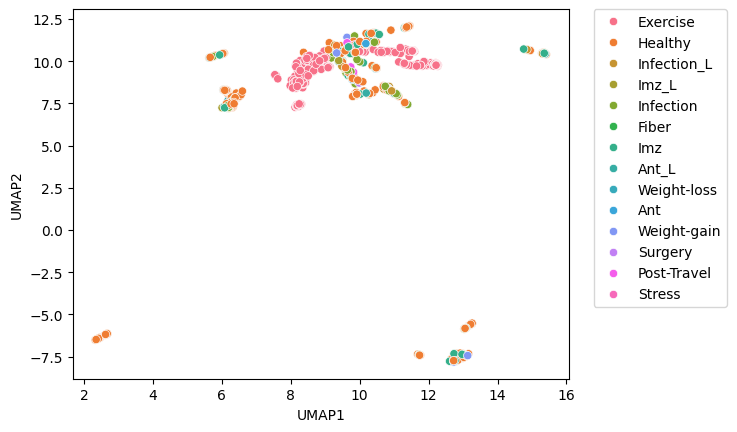

In [30]:
sns.scatterplot(data=umap_data, x='UMAP1', y='UMAP2',hue='Event')
# place a legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
# plot a umap of the data colored by the event

import umap


In [32]:
mapper = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, metric='correlation')

embedding = mapper.fit_transform(main_matrix.T)

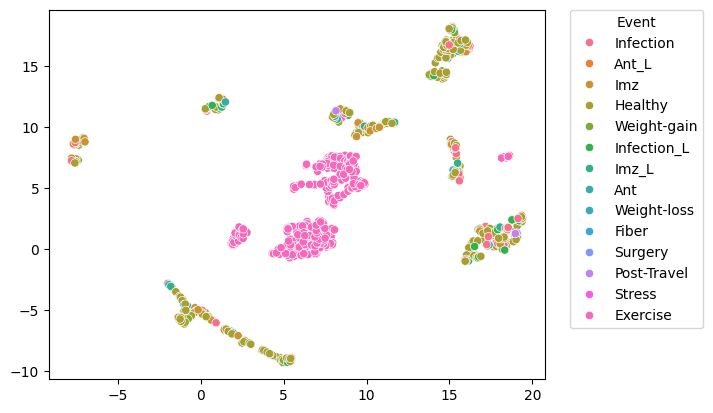

In [37]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['Event'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Event')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

Text(0, 0.5, 'UMAP2')

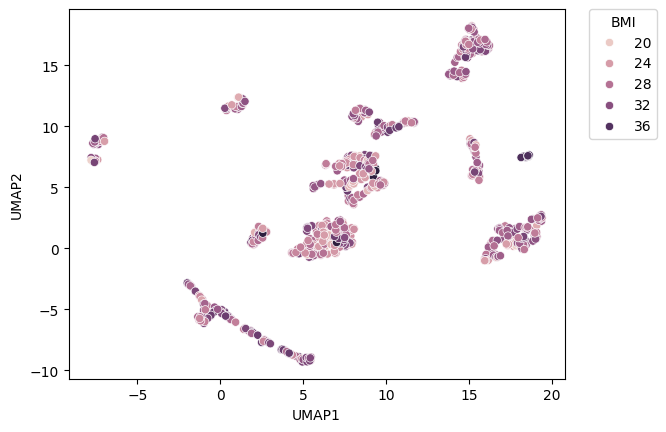

In [38]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['BMI'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='BMI')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

Text(0, 0.5, 'UMAP2')

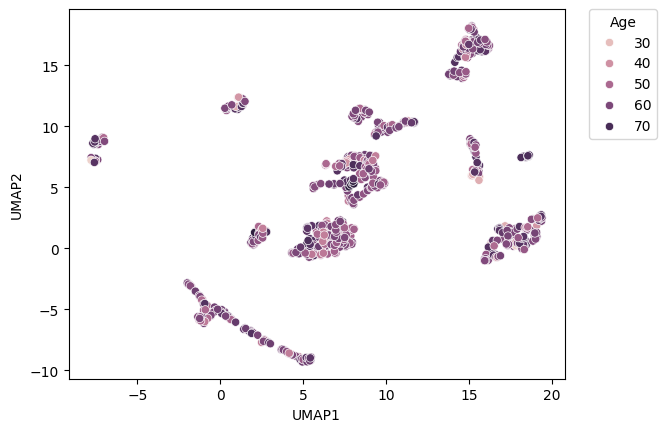

In [39]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['Age'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

Text(0, 0.5, 'UMAP2')

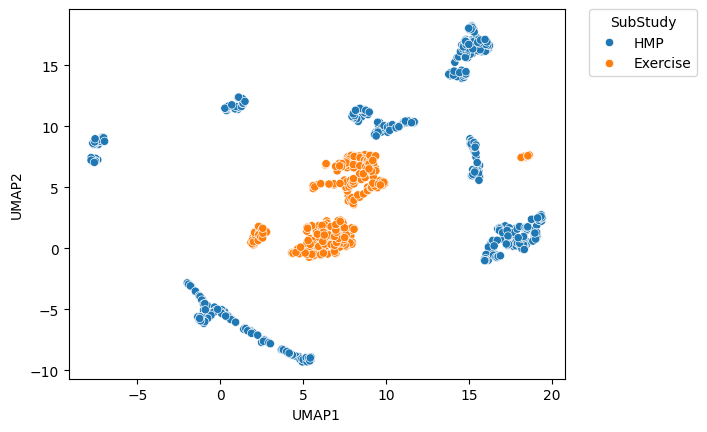

In [40]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['SubStudy'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='SubStudy')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

In [41]:
# plot the PCA of the data colored by the event

from sklearn.decomposition import PCA


In [42]:
pca = PCA(n_components=2)

pca_embedding = pca.fit_transform(main_matrix.T)



Text(0, 0.5, 'PCA2')

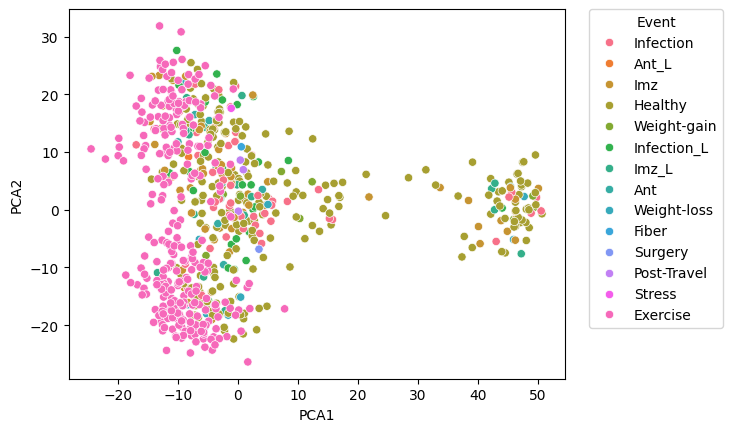

In [43]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['Event'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Event')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

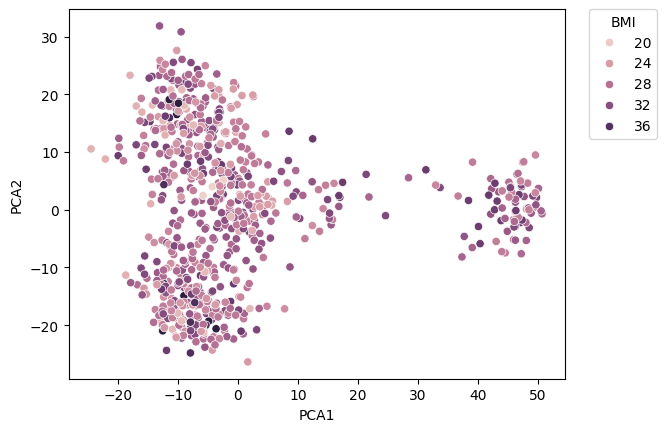

In [44]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['BMI'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='BMI')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

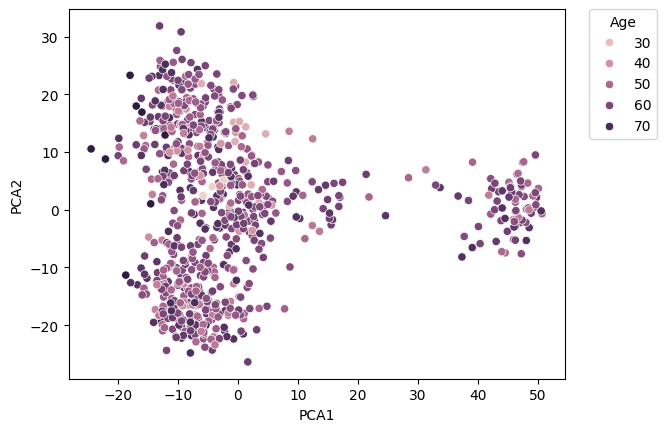

In [45]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['Age'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

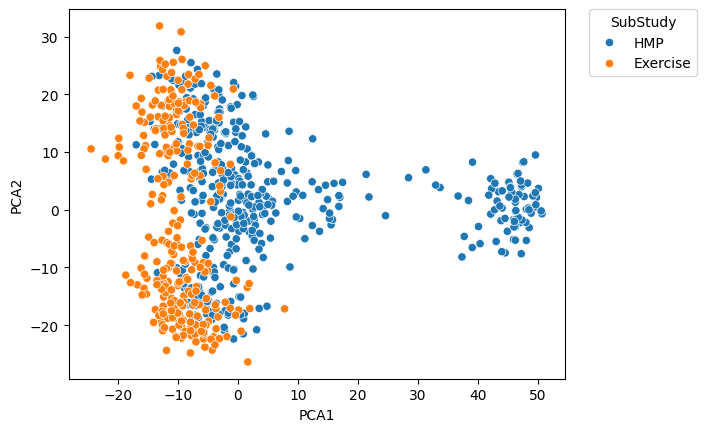

In [47]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['SubStudy'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='SubStudy')
plt.xlabel('PCA1')
plt.ylabel('PCA2')